In [1]:
#importing some libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [6]:
#importing data
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

In [7]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# joining training and testing data for cleaning by removing the survived data
train_sur = train['Survived'].copy()
train.drop('Survived', axis=1, inplace=True, errors='ignore')
titanic = pd.concat([train, test])

In [10]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

<AxesSubplot:>

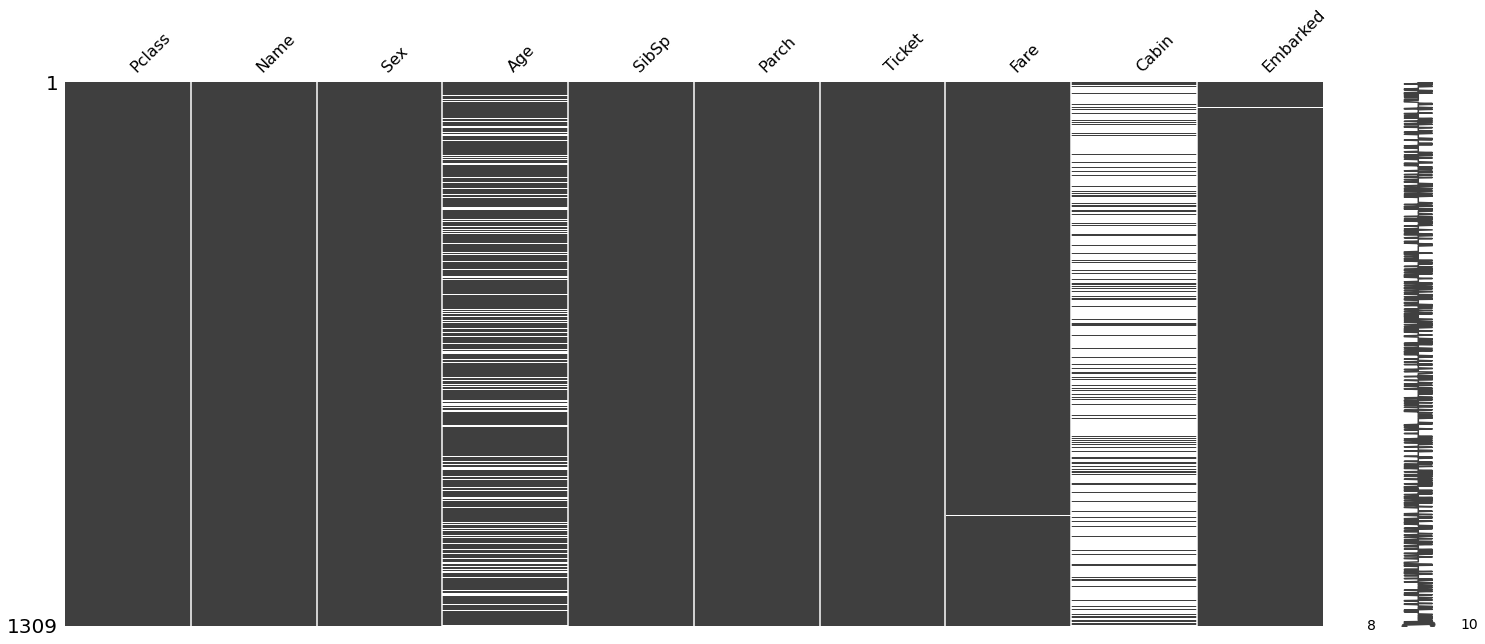

In [13]:
msn.matrix(titanic)

In [16]:
#------------------------- TRYING TO CLEAN 'CABIN' COLUMN ---------------------------------
# Creating a cabin dataframe that cotains only cabin information
cabin = titanic[['Cabin']].copy()
cabin['Cabin_data'] = cabin['Cabin'].isnull().apply(lambda x : not x)
cabin['Deck'] = cabin['Cabin'].str.slice(0, 1)
cabin['Room'] = cabin['Cabin'].str.slice(1, 5).str.extract("([0-9]+)", expand=False).astype("float")
# cabin = cabin[cabin['Cabin_data']]
# cabin.drop('Cabin_data', axis=1, inplace=True, errors='ignore')
cabin[cabin['Cabin_data']]

,Cabin,Cabin_data,Deck,Room
PassengerId,,,,
2,C85,True,C,85.0
4,C123,True,C,123.0
7,E46,True,E,46.0
11,G6,True,G,6.0
12,C103,True,C,103.0
...,...,...,...,...
1296,D40,True,D,40.0
1297,D38,True,D,38.0
1299,C80,True,C,80.0


In [17]:
# Analysing Deck 'F'
cabin[cabin["Deck"]=="F"]

,Cabin,Cabin_data,Deck,Room
PassengerId,,,,
67,F33,True,F,33.0
76,F G73,True,F,73.0
129,F E69,True,F,69.0
149,F2,True,F,2.0
184,F4,True,F,4.0
194,F2,True,F,2.0
341,F2,True,F,2.0
346,F33,True,F,33.0
517,F33,True,F,33.0


In [18]:
cabin.drop(['Cabin', 'Cabin_data'], axis=1, inplace=True, errors='ignore')

cabin['Deck'] = cabin['Deck'].fillna("N")
cabin['Room'] = cabin['Room'].fillna(cabin['Room'].mean())

cabin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deck    1309 non-null   object 
 1   Room    1309 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.7+ KB


In [19]:
def one_hot_column(df, label, drop_col):
    '''
    This function will one hot encode the chosen column.
    Args:
        df: Pandas dataframe
        label: Label of the column to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df

def one_hot(df, labels, drop_col):
    '''
    This function will one hot encode a list of columns.
    Args:
        df: Pandas dataframe
        labels: list of the columns to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

In [20]:
cabin = one_hot(cabin, ['Deck'], drop_col=True)

In [21]:
cabin.head()

,Room,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T
PassengerId,,,,,,,,,,
1,49.615917,0,0,0,0,0,0,0,1,0
2,85.000000,0,0,1,0,0,0,0,0,0
3,49.615917,0,0,0,0,0,0,0,1,0
4,123.000000,0,0,1,0,0,0,0,0,0
5,49.615917,0,0,0,0,0,0,0,1,0


In [25]:
for column in cabin.columns:
    titanic[column] = cabin[column]

In [26]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Room
PassengerId,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,1,0,49.615917
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0,85.000000
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,1,0,49.615917
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0,0,123.000000
5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,1,0,49.615917


In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
 8   Deck_A    1309 non-null   uint8  
 9   Deck_B    1309 non-null   uint8  
 10  Deck_C    1309 non-null   uint8  
 11  Deck_D    1309 non-null   uint8  
 12  Deck_E    1309 non-null   uint8  
 13  Deck_F    1309 non-null   uint8  
 14  Deck_G    1309 non-null   uint8  
 15  Deck_N    1309 non-null   uint8  
 16  Deck_T    1309 non-null   uint8  
 17  Room      1309 non-null   float64
dtypes: float64(3), int64(3), object(3), uint8(9)
memory usage: 113.8+ KB


In [28]:
# ---------------------- Trying to Clean Age value --------------------

# Number of null values
titanic['Age'].isnull().sum()

263

In [29]:
# Using KNN Imputer from scikit library
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2, weights='uniform')

titanic['Age'] = imputer.fit_transform(titanic[['Age']])

In [30]:
titanic['Age'].isnull().sum()

0

In [31]:
titanic.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    2
Deck_A      0
Deck_B      0
Deck_C      0
Deck_D      0
Deck_E      0
Deck_F      0
Deck_G      0
Deck_N      0
Deck_T      0
Room        0
dtype: int64

In [32]:
# --------------------------Handleing Missing Fare Value-----------------------------
titanic[titanic['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Room
PassengerId,,,,,,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,0,0,0,0,0,0,0,1,0,49.615917


In [33]:
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

In [36]:
titanic.loc[1044]

Pclass                       3
Name        Storey, Mr. Thomas
Sex                       male
Age                       60.5
SibSp                        0
Parch                        0
Fare                   14.4542
Embarked                     S
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_N                       1
Deck_T                       0
Room                   49.6159
Name: 1044, dtype: object

In [37]:
titanic.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Deck_A      0
Deck_B      0
Deck_C      0
Deck_D      0
Deck_E      0
Deck_F      0
Deck_G      0
Deck_N      0
Deck_T      0
Room        0
dtype: int64

In [38]:
# Filling the empty Embarked value with C.
titanic['Embarked'] = titanic['Embarked'].fillna('C')

In [39]:
titanic.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck_A      0
Deck_B      0
Deck_C      0
Deck_D      0
Deck_E      0
Deck_F      0
Deck_G      0
Deck_N      0
Deck_T      0
Room        0
dtype: int64

In [79]:
# As we now do not have any null values, it's time to map the string features to some integers

# Replacing Male with 0 and female with 1
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [83]:
# Replacing Embarked values: 0 for S, 1 for C, and 2 for Q
titanic['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

In [84]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   int64  
 8   Deck_A    1309 non-null   uint8  
 9   Deck_B    1309 non-null   uint8  
 10  Deck_C    1309 non-null   uint8  
 11  Deck_D    1309 non-null   uint8  
 12  Deck_E    1309 non-null   uint8  
 13  Deck_F    1309 non-null   uint8  
 14  Deck_G    1309 non-null   uint8  
 15  Deck_N    1309 non-null   uint8  
 16  Deck_T    1309 non-null   uint8  
 17  Room      1309 non-null   float64
dtypes: float64(3), int64(5), object(1), uint8(9)
memory usage: 153.8+ KB


In [85]:
titanic.drop('Name', axis=1, inplace=True, errors='ignore')

In [86]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   int64  
 7   Deck_A    1309 non-null   uint8  
 8   Deck_B    1309 non-null   uint8  
 9   Deck_C    1309 non-null   uint8  
 10  Deck_D    1309 non-null   uint8  
 11  Deck_E    1309 non-null   uint8  
 12  Deck_F    1309 non-null   uint8  
 13  Deck_G    1309 non-null   uint8  
 14  Deck_N    1309 non-null   uint8  
 15  Deck_T    1309 non-null   uint8  
 16  Room      1309 non-null   float64
dtypes: float64(3), int64(5), uint8(9)
memory usage: 143.5 KB


In [87]:
# Classifying the Age column into 5 classes for 0 to 4

titanic.loc[ titanic['Age'] <= 16, 'Age'] = 0
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
titanic.loc[ titanic['Age'] > 64, 'Age'] = 4

In [89]:
titanic['Age'] = titanic['Age'].astype('int')

In [90]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Room
PassengerId,,,,,,,,,,,,,,,,,
1,3,0,1,1,0,7.2500,0,0,0,0,0,0,0,0,1,0,49.615917
2,1,1,2,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,85.000000
3,3,1,1,0,0,7.9250,0,0,0,0,0,0,0,0,1,0,49.615917
4,1,1,2,1,0,53.1000,0,0,0,1,0,0,0,0,0,0,123.000000
5,3,0,2,0,0,8.0500,0,0,0,0,0,0,0,0,1,0,49.615917


In [91]:
# Creating new Column- IsAlone, to check if a person is alone or with family
# if alone, assigning 0, else 1

titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

In [94]:
# dropping FamilySize, SibSp, Parch
titanic = titanic.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [95]:
titanic.head()

,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Room,IsAlone
PassengerId,,,,,,,,,,,,,,,,
1,3,0,1,7.2500,0,0,0,0,0,0,0,0,1,0,49.615917,0
2,1,1,2,71.2833,1,0,0,1,0,0,0,0,0,0,85.000000,0
3,3,1,1,7.9250,0,0,0,0,0,0,0,0,1,0,49.615917,1
4,1,1,2,53.1000,0,0,0,1,0,0,0,0,0,0,123.000000,0
5,3,0,2,8.0500,0,0,0,0,0,0,0,0,1,0,49.615917,1


In [96]:
# Classifyng Fare into 4 classes from 0 to 3
titanic.loc[ titanic['Fare'] <= 7.91, 'Fare'] = 0
titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 2
titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 3
titanic['Fare'] = titanic['Fare'].astype(int)

In [97]:
titanic.head()

,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,Room,IsAlone
PassengerId,,,,,,,,,,,,,,,,
1,3,0,1,0,0,0,0,0,0,0,0,0,1,0,49.615917,0
2,1,1,2,3,1,0,0,1,0,0,0,0,0,0,85.000000,0
3,3,1,1,1,0,0,0,0,0,0,0,0,1,0,49.615917,1
4,1,1,2,3,0,0,0,1,0,0,0,0,0,0,123.000000,0
5,3,0,2,1,0,0,0,0,0,0,0,0,1,0,49.615917,1


In [98]:
titanic = titanic.drop('Room', axis=1)

In [99]:
titanic.head()

,Pclass,Sex,Age,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,IsAlone
PassengerId,,,,,,,,,,,,,,,
1,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,2,3,1,0,0,1,0,0,0,0,0,0,0
3,3,1,1,1,0,0,0,0,0,0,0,0,1,0,1
4,1,1,2,3,0,0,0,1,0,0,0,0,0,0,0
5,3,0,2,1,0,0,0,0,0,0,0,0,1,0,1


In [101]:
# distributing the dataset to train the model
train = titanic.loc[1:891, ]
test = titanic.loc[892: ,]

train['Survived'] = train_sur

<ipython-input-101-15230739efbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = train_sur


In [103]:
Y = train['Survived']
X = train.drop("Survived", axis=1).copy()

In [104]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, Y)

RandomForestClassifier()

In [105]:
pred = rfc.predict(test)

In [106]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [110]:
result = pd.DataFrame()
result['PassengerId'] = test.index
result['Survived'] = pred

result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [111]:
result.to_csv("Result.csv", index=False)

In [112]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X, Y)
pred2 = svc.predict(test)

In [113]:
pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [114]:
result2 = pd.DataFrame()
result2['PassengerId'] = test.index
result2['Survived'] = pred2

result2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [115]:
result.to_csv("Result_SVC.csv", index=False)